In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("/home/alirachidi/doordash/prediction")

from modules.main.processing import *
from modules.main import parameters as p

2022-08-25 22:57:27.274756: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-25 22:57:27.274791: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
!pwd
p.init({'testing': '0', 'description': 'test'}, "data_analysis")


/home/alirachidi/doordash/prediction/jobs
-- Collecting Variables... --
Tensorflow Version: 2.7.0
Num GPUs Available:  0
PID: 2535
Description: test
File dir is /home/alirachidi/doordash/prediction/cache/data_analysis
--- All variables have been collected. --


2022-08-25 22:57:30.228984: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-08-25 22:57:30.229017: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-25 22:57:30.229033: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (instance-1): /proc/driver/nvidia/version does not exist


In [3]:
# cache_root = "../../prediction/cache/"
# data_root = "../../data/"

historical_data = pd.read_csv(os.path.join(p.data_root, "historical_data.csv"))
df_test = pd.read_csv(os.path.join(p.data_root, "predict_data.csv"))
categorical_columns = ['store_id', 'market_id', 'week_day',
                       'hour', 'month', 'weekend', 'day_part', 'day_of_month']
numerical_columns = ['subtotal', 'total_onshift_dashers',
                     'total_busy_dashers', 'total_outstanding_orders',
                     'estimated_store_to_consumer_driving_duration', 'delivery_duration_sec']


In [4]:
historical_data
print("beg")
print(historical_data['created_at'].sort_values(ascending=True).head())
print("end")
print(historical_data['created_at'].sort_values(ascending=True).tail())

beg
2690      2014-10-19 05:24:15
43519     2015-01-21 15:22:03
148754    2015-01-21 15:31:51
187014    2015-01-21 15:39:16
10265     2015-01-21 15:40:42
Name: created_at, dtype: object
end
176616    2015-02-18 05:57:51
100474    2015-02-18 05:58:07
191692    2015-02-18 05:59:01
168114    2015-02-18 05:59:23
61787     2015-02-18 06:00:44
Name: created_at, dtype: object


In [5]:
df_test
print("beg")
print(df_test['created_at'].sort_values(ascending=True).head())
print("end")
print(df_test['created_at'].sort_values(ascending=True).tail())

beg
27577    2015-02-18 14:50:28
50927    2015-02-18 14:59:26
47372    2015-02-18 15:04:22
22766    2015-02-18 15:13:50
1385     2015-02-18 15:22:38
Name: created_at, dtype: object
end
6743     2015-02-25 05:58:32
52619    2015-02-25 05:58:56
30709    2015-02-25 05:59:35
38205    2015-02-25 05:59:41
34166    2015-02-25 05:59:49
Name: created_at, dtype: object


# processing timestamps

In [6]:
process_timestamps(historical_data, ['created_at', 'actual_delivery_time'])
historical_data['delivery_duration_sec'] = (historical_data['actual_delivery_time'] - historical_data['created_at']).dt.total_seconds()

# cleaning data

In [7]:
historical_data.isnull().sum().sum() # number of null elements

50313

In [8]:
temp = historical_data
temp.drop(['created_at', 'actual_delivery_time'], axis=1).lt(0).sum().sum() # number of elements less than 0 

86

In [9]:
historical_data = clean_data(
    historical_data, ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders'])


In [10]:
historical_data.isnull().sum().sum()

0

In [11]:
historical_data.drop(['created_at', 'actual_delivery_time'], axis=1).lt(0).sum().sum()

0

There is a decent amount of outliers in delivery_duration_sec

In [12]:
print(historical_data.loc[86952]) 

market_id                                                       3.0
created_at                                      2015-02-05 02:11:40
actual_delivery_time                            2015-02-05 15:34:38
store_id                                                       1764
subtotal                                                       2185
total_onshift_dashers                                          19.0
total_busy_dashers                                             19.0
total_outstanding_orders                                       16.0
estimated_store_to_consumer_driving_duration                  787.0
delivery_duration_sec                                       48178.0
Name: 86952, dtype: object


subtotal
188378    26800
96456     22500
53072     20350
73129     19250
171276    18920
8994      18370
176874    17600
69243     17008
54486     16350
181734    15960
Name: subtotal, dtype: int64


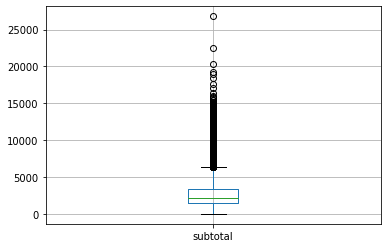

total_onshift_dashers
21545     171.0
170897    169.0
190274    168.0
100018    165.0
140992    164.0
110321    163.0
92520     162.0
6764      160.0
14483     160.0
78487     160.0
Name: total_onshift_dashers, dtype: float64


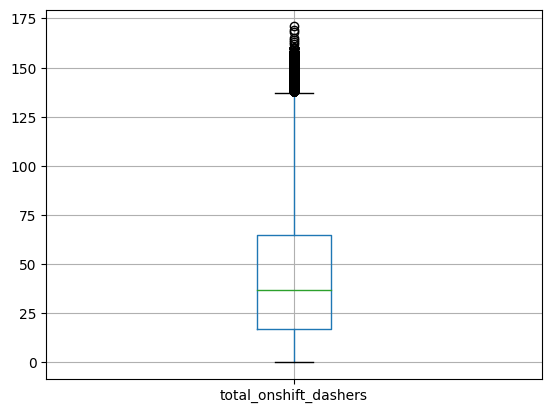

total_busy_dashers
27815     154.0
98033     152.0
168689    152.0
20270     150.0
85602     150.0
95710     149.0
1843      148.0
12511     148.0
27156     148.0
27159     148.0
Name: total_busy_dashers, dtype: float64


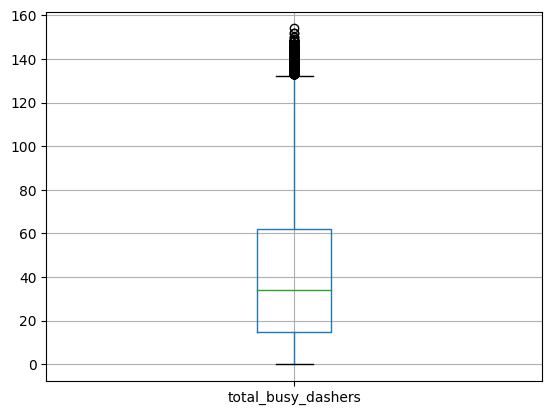

total_outstanding_orders
20724     285.0
115743    283.0
27960     278.0
30825     278.0
34491     278.0
44205     278.0
66350     278.0
86385     278.0
86726     278.0
98371     278.0
Name: total_outstanding_orders, dtype: float64


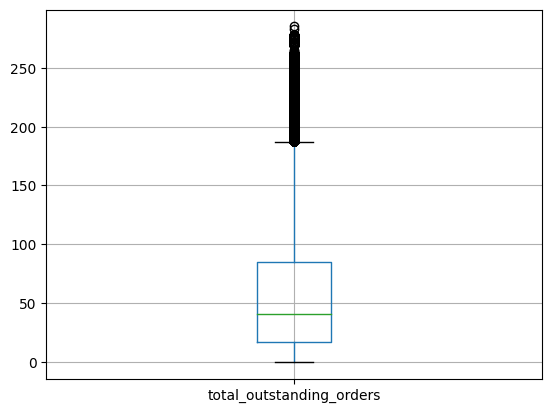

estimated_store_to_consumer_driving_duration
7975      2088.0
139097    1739.0
27843     1711.0
7984      1680.0
39787     1667.0
7961      1547.0
7966      1525.0
133716    1460.0
150091    1448.0
150105    1448.0
Name: estimated_store_to_consumer_driving_duration, dtype: float64


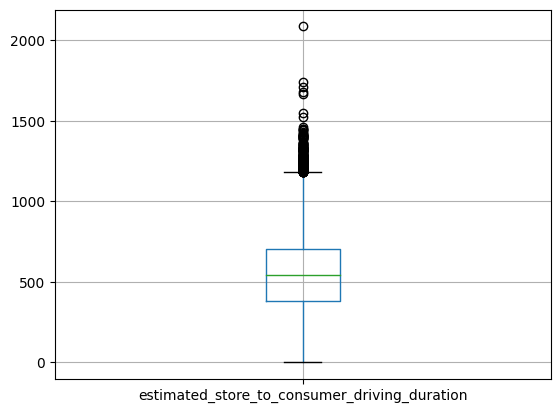

delivery_duration_sec
185550    373879.0
27189     332482.0
83055      57032.0
190860     54447.0
86952      48178.0
76743      45685.0
105825     39352.0
175971     38143.0
139989     36196.0
51228      32929.0
Name: delivery_duration_sec, dtype: float64


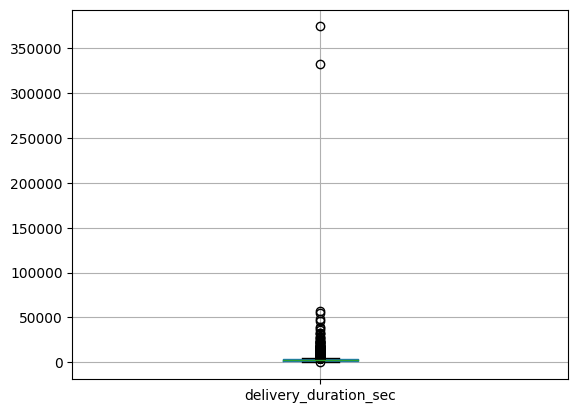

In [13]:
def plot_outliers(df, columns):
    for c in columns:
        print(c)
        print(df[c].nlargest(n=10))
        boxplt = df.boxplot(column=[c])
        plt.show()

plot_outliers(historical_data, numerical_columns) # notice the outliers in delivery_duration sec

# Adding New Features

In [14]:
from modules.main.feature_engineering import *
p.feature_writing = False
historical_data = add_features(historical_data)
historical_data = remove_outliers(historical_data)  # called in post processing for flexibility
# note: current file writing happens before removing outliers, so one must include outliers when reading file for matching elements/dimensions

# Categorical Data Analysis

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id', 'subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'delivery_duration_sec', 'week_day', 'weekend', 'day_of_month', 'month', 'hour', 'day_part', 'count_by_store_id', 'avg_subtotal_by_store_id', 'avg_time_by_store_id', 'count_by_market_id', 'avg_subtotal_by_market_id', 'avg_time_by_market_id'], dtype='object')


/home/alirachidi/anaconda3/envs/classification/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alirachidi/anaconda3/envs/classification/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/alirachidi/anaconda3/envs/classification/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit

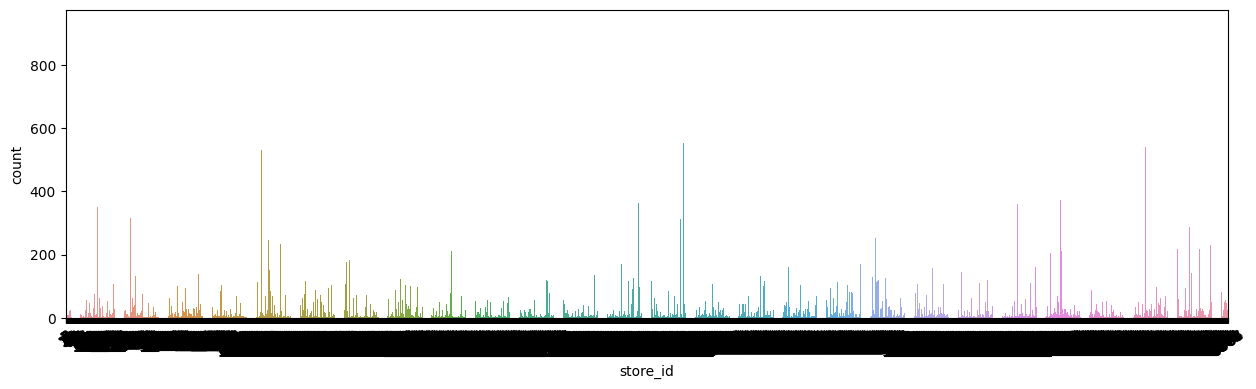

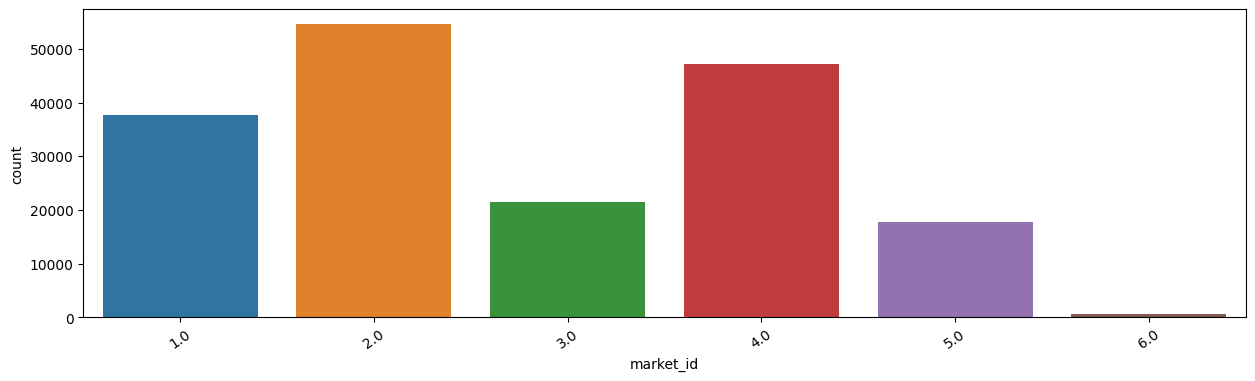

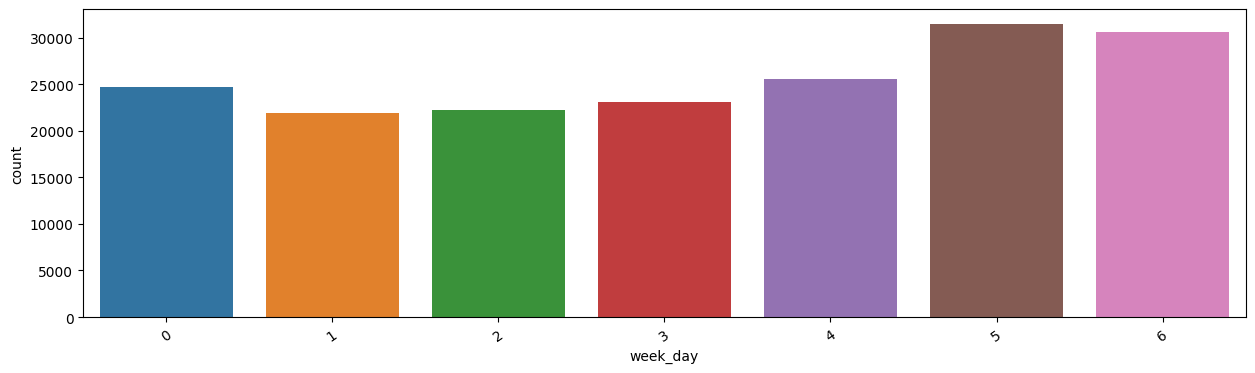

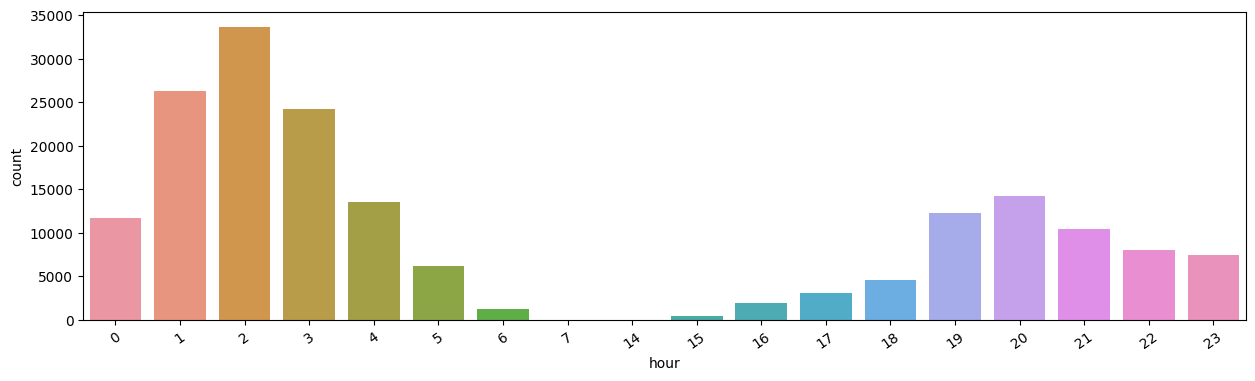

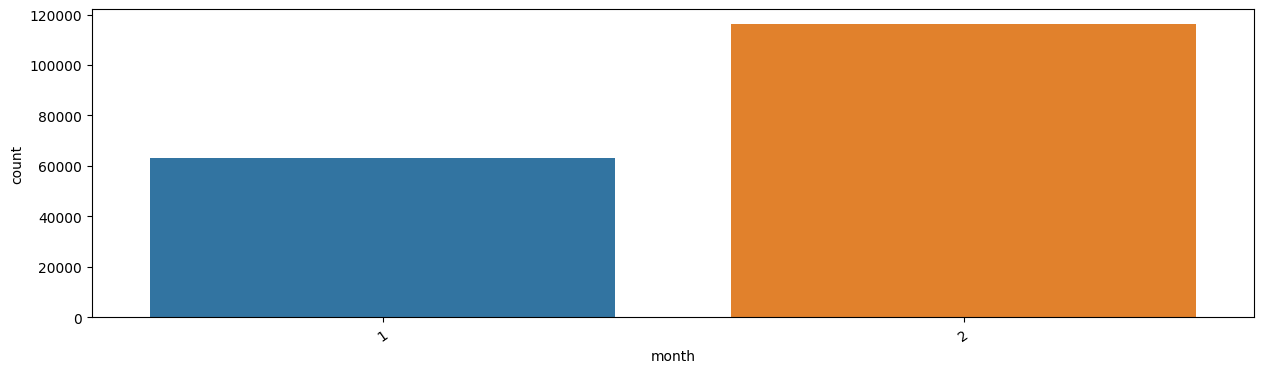

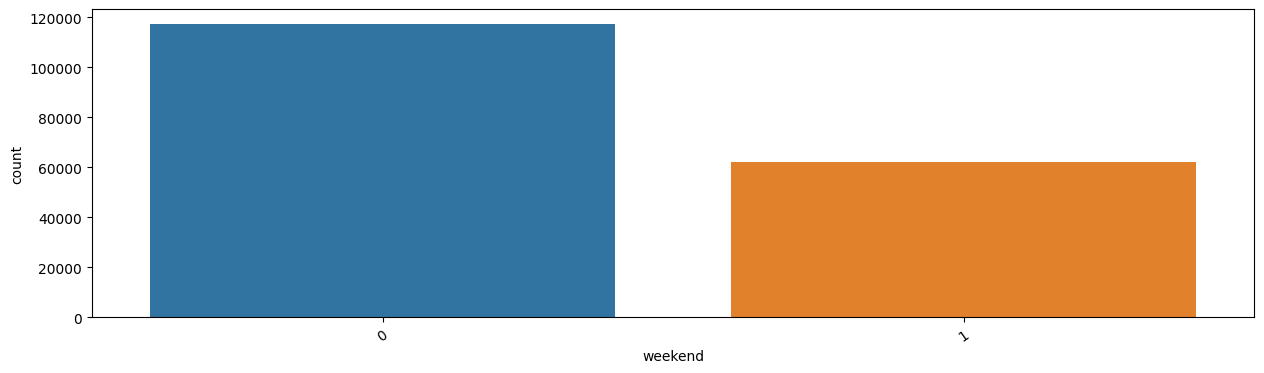

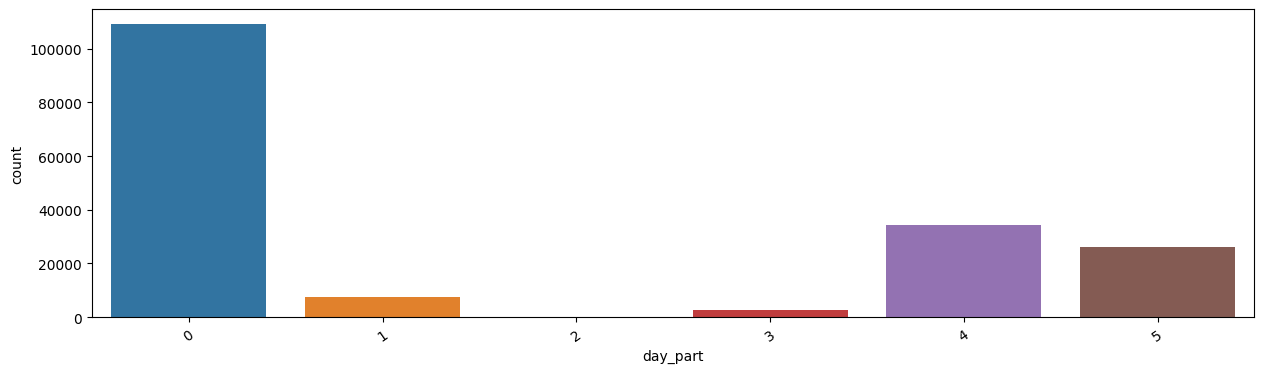

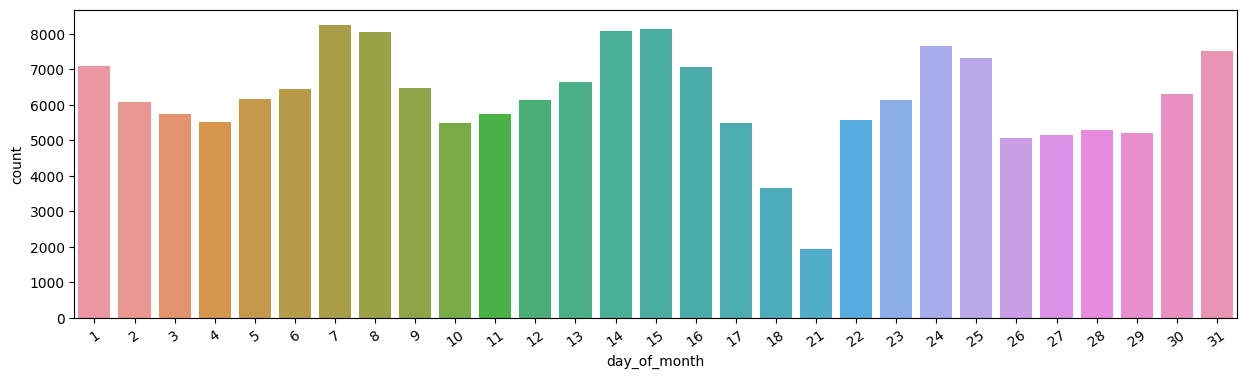

In [15]:

def categorize_data(df, columns):
    for i,c in enumerate(columns):
        df_cat = df[c].value_counts().to_frame().reset_index()
        df_cat.columns = [c,"count"]
        plt.figure(i, figsize=(15, 4))
        sns.barplot(df_cat[c],df_cat["count"])
        plt.xticks(rotation=35)

print(historical_data.columns)

categorize_data(historical_data, categorical_columns)

Observations:

variables are well distributed so there is a lot of substance to work with<br>
the distribution of time variables indicate trends and could play a large role in prediction<br>
market_id and store_id have enough variability that we can try to exploit <br>

# Numerical data analysis

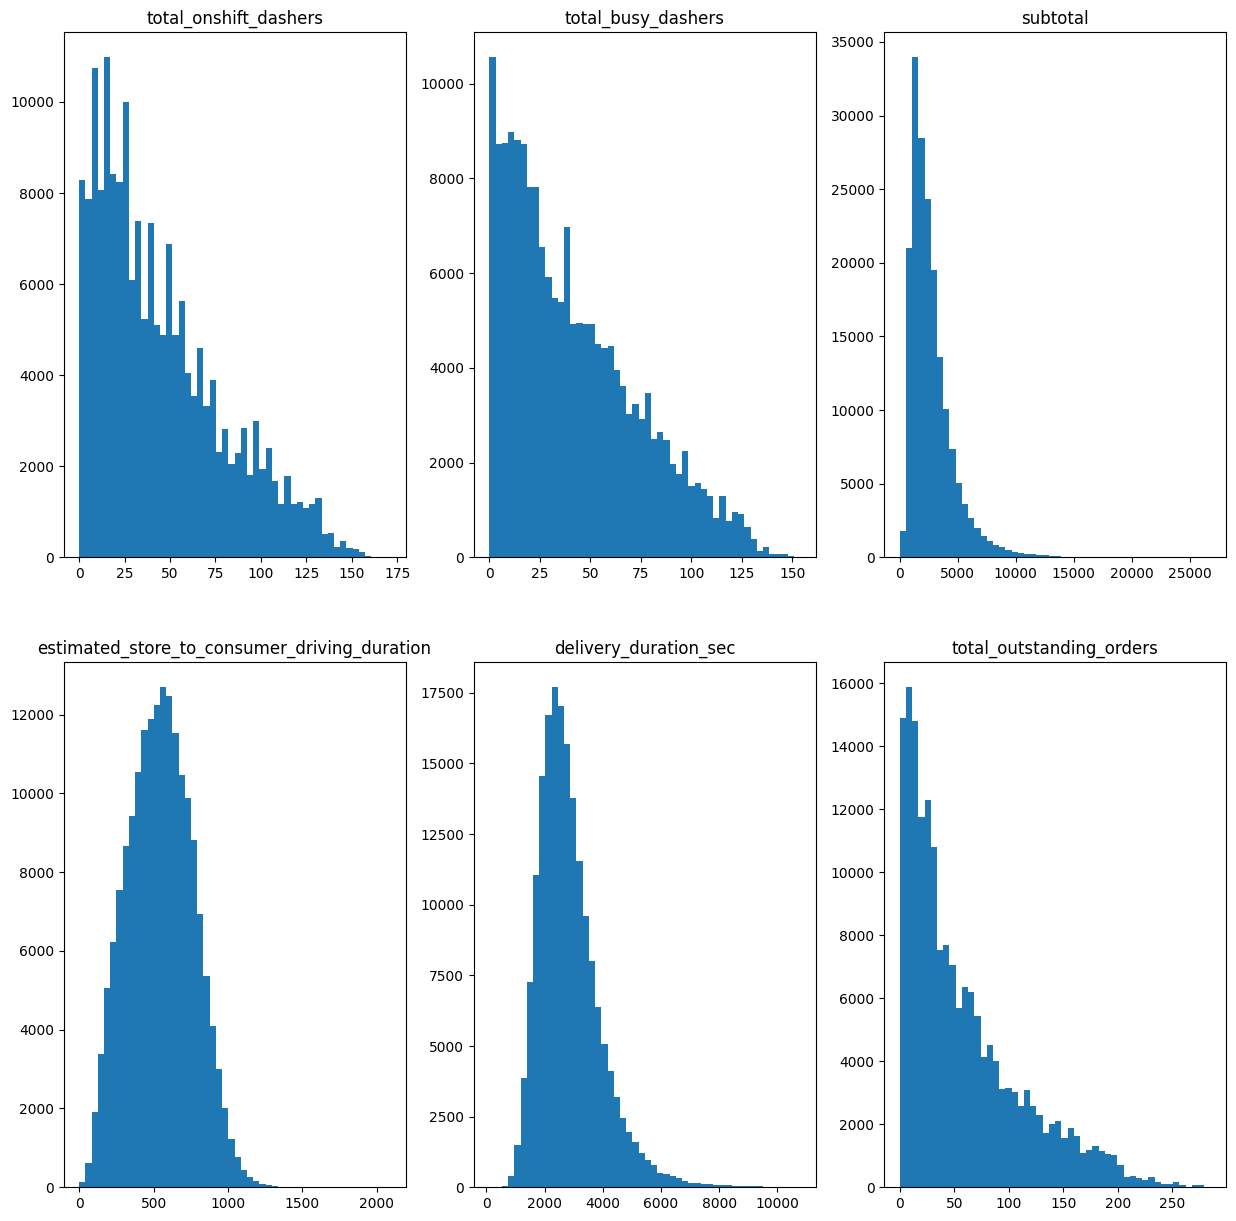

In [16]:
def plot_numerical_columns(df, columns):
    fig, axes = plt.subplots(2, 3, figsize=(15, 15))
    for i,n in enumerate(columns):
        axes[i//3][(i%3)-1].hist(df[n],bins=50)
        axes[i//3][(i%3)-1].set_title(n)

plot_numerical_columns(historical_data, numerical_columns)

notice the uneven distributions, or long-tail distributions, across all variables

<AxesSubplot:>

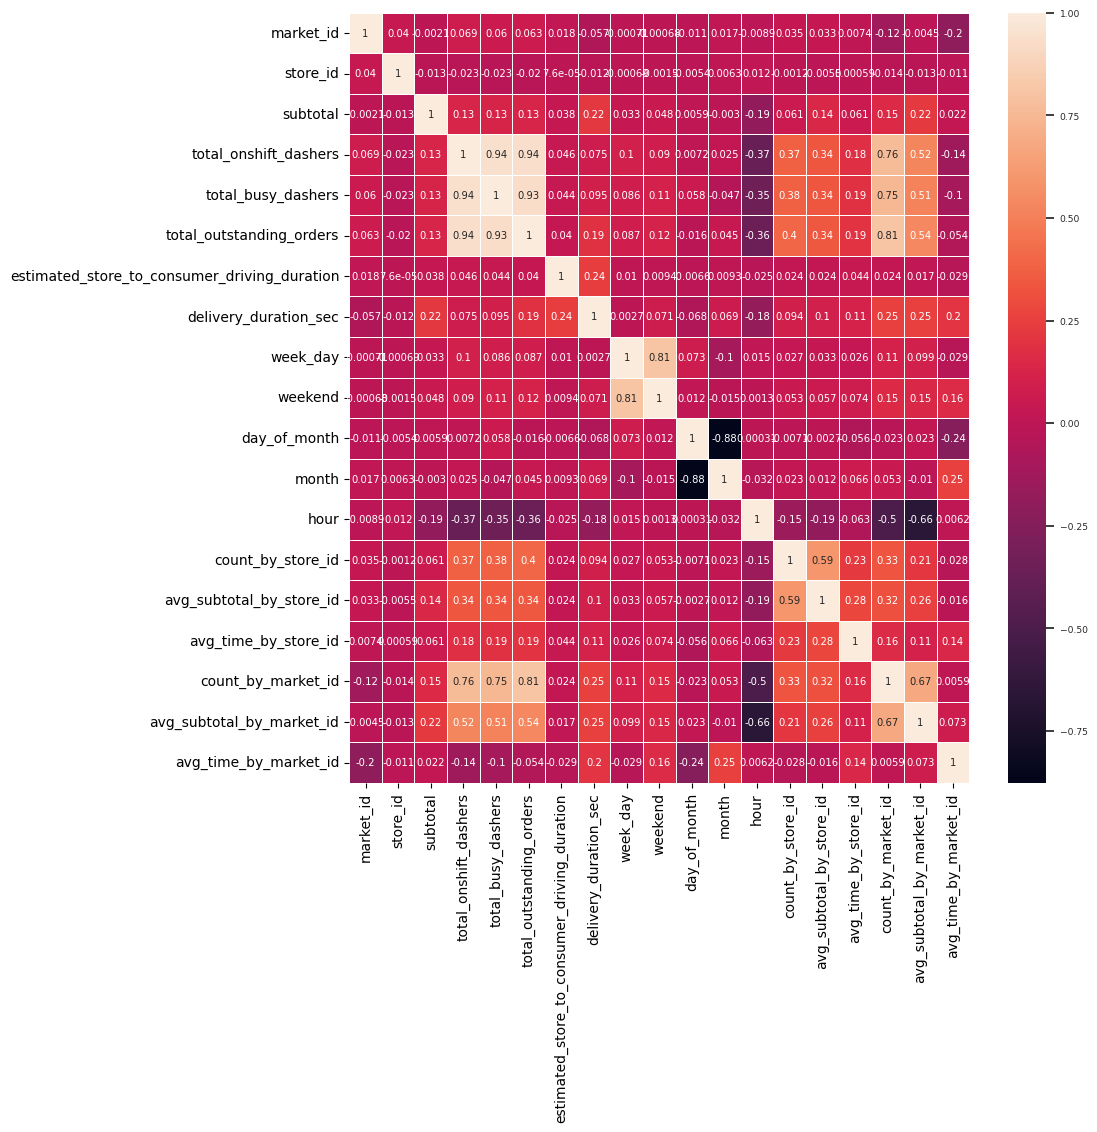

In [17]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.set(font_scale=0.6)
sns.heatmap(historical_data.corr(), annot=True, linewidths=.5, ax=ax)

observations:
count by market_id does not correlate with avg time by market_id, while store_id <br>
good correlations between dashers info and market_id/store_id features <br>
biggest correlators with label y are the new features, although some of them represent the same quantity, namely, avg_time

# New Feature Analysis

/home/alirachidi/anaconda3/envs/classification/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  # Remove the CWD from sys.path while we load stuff.


count_by_store_id
0                    112301
1                     36998
2                     15314
3                      7099
4                      3585
5                      1963
6                      1037
7                       573
8                       278
9                       142
dtype: int64
count_by_store_id
0                    0.625441
1                    0.206054
2                    0.085289
3                    0.039537
4                    0.019966
5                    0.010933
6                    0.005775
7                    0.003191
8                    0.001548
9                    0.000791
dtype: float64
avg_subtotal_by_store_id
0.0                         112331
2300.0                         198
1500.0                         193
2000.0                         192
3300.0                         190
1800.0                         186
1900.0                         180
2400.0                         179
2200.0                         178
2600.0          

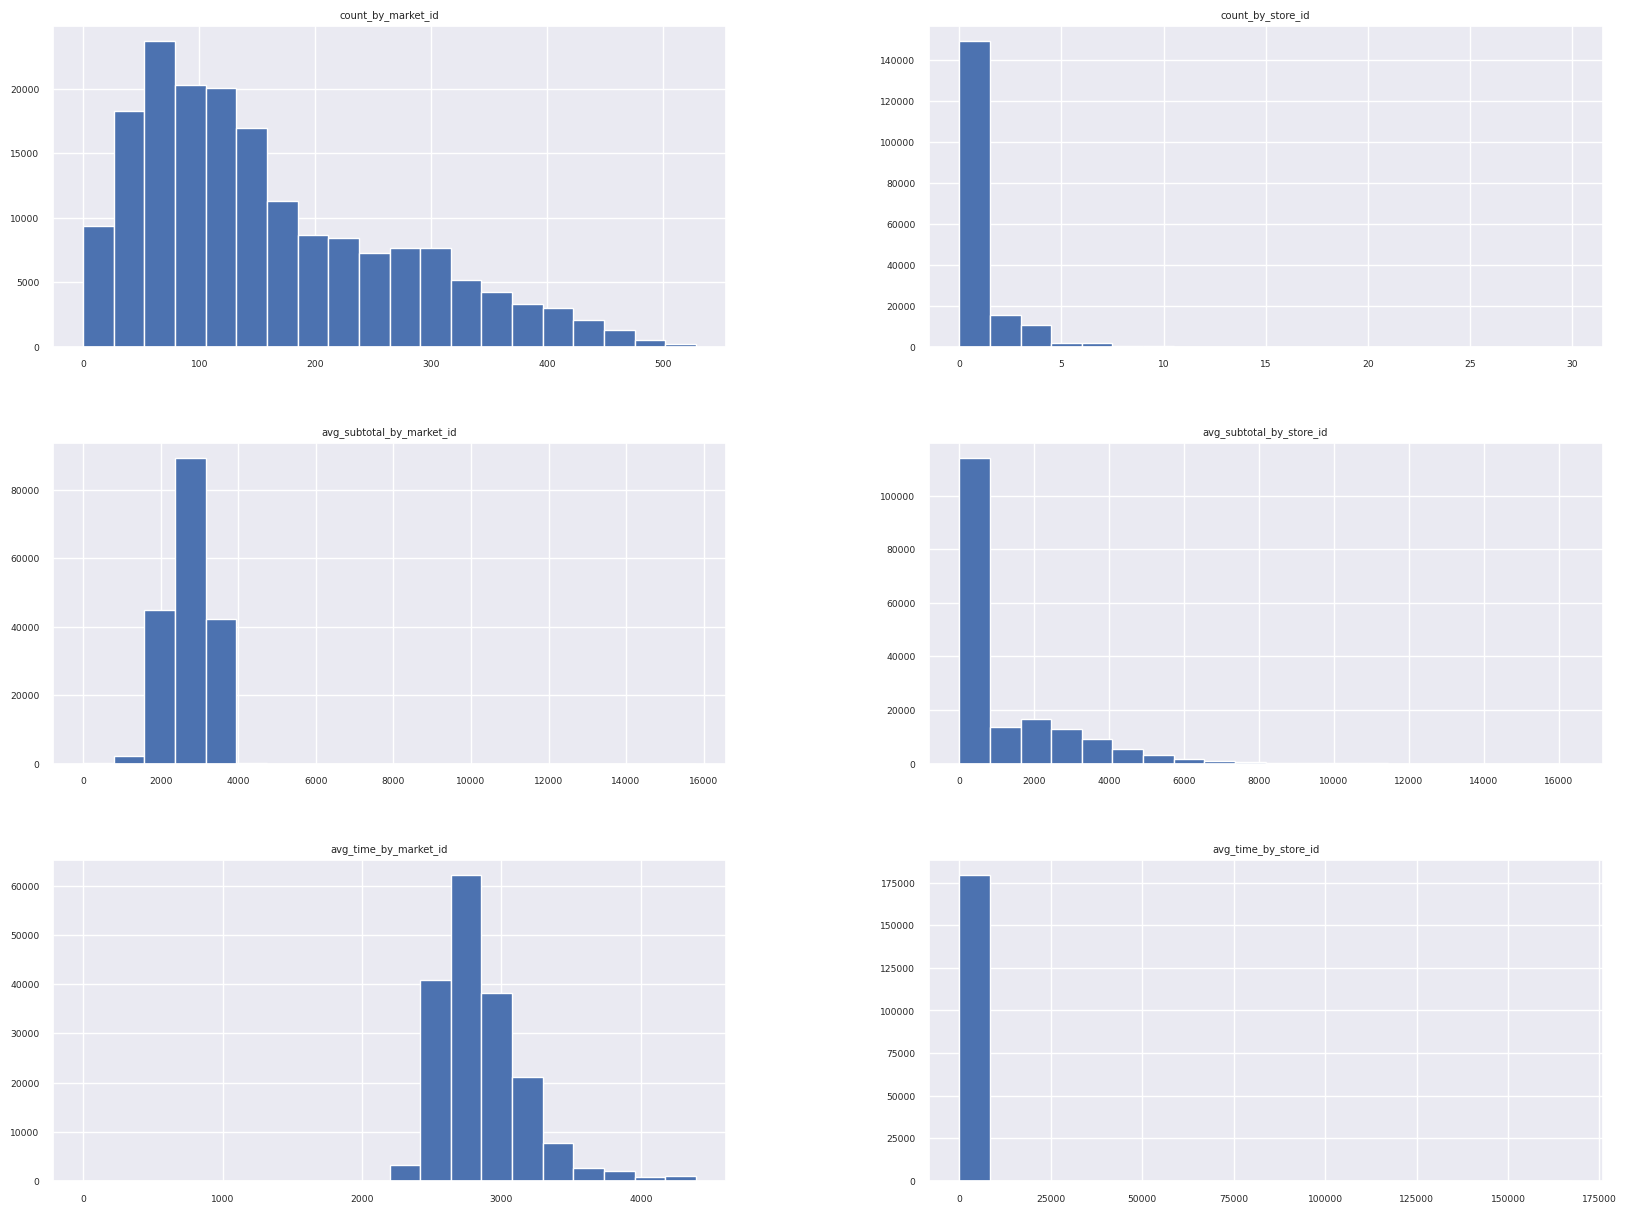

In [18]:
# distribution and sparsity of new features
fig = plt.figure(figsize=(20, 15))
ax = fig.gca()

historical_data.hist(column=['count_by_market_id',
                        'count_by_store_id',
                        'avg_subtotal_by_market_id',
                        'avg_subtotal_by_store_id',
                        'avg_time_by_market_id',
                        'avg_time_by_store_id'], ax=ax, bins=20)

for c in ['count_by_store_id', 'avg_subtotal_by_store_id', 'avg_time_by_store_id']:
    print(historical_data[[c]].value_counts()[:10])
    print(historical_data[[c]].value_counts()[:10]/historical_data.shape[0])


observation: market_id features are not sparse but store_id features are. Nonetheless, they are rich in information!

threshold for long tail: 0.9 percentile, 4229.0, or 70.48333333333333 minutes
threshold for short tail: 0.1 percentile, 1700.0 or 28.333333333333332 minutes
name: market_id_1.0
long tails ratio: 0.15688982128156784
short tails ratio: 0.08994343681121704
name: market_id_2.0
long tails ratio: 0.0756959706959707
short tails ratio: 0.10388278388278388
name: market_id_3.0
long tails ratio: 0.09841534612176814
short tails ratio: 0.09730330831248263
name: market_id_4.0
long tails ratio: 0.08925507805053692
short tails ratio: 0.10245059623408807
name: market_id_5.0
long tails ratio: 0.08520531062685564
short tails ratio: 0.10694078763094504
name: market_id_6.0
long tails ratio: 0.09815950920245399
short tails ratio: 0.0950920245398773
name: store_id_1
long tails ratio: 0.0
short tails ratio: 0.125
name: store_id_2
long tails ratio: 0.0
short tails ratio: 0.0
name: store_id_3
long tails ratio: 0.0
short tails ratio: 0.0
name: store_id_4
long tails ratio: 0.13432835820895522
short tails ratio: 0

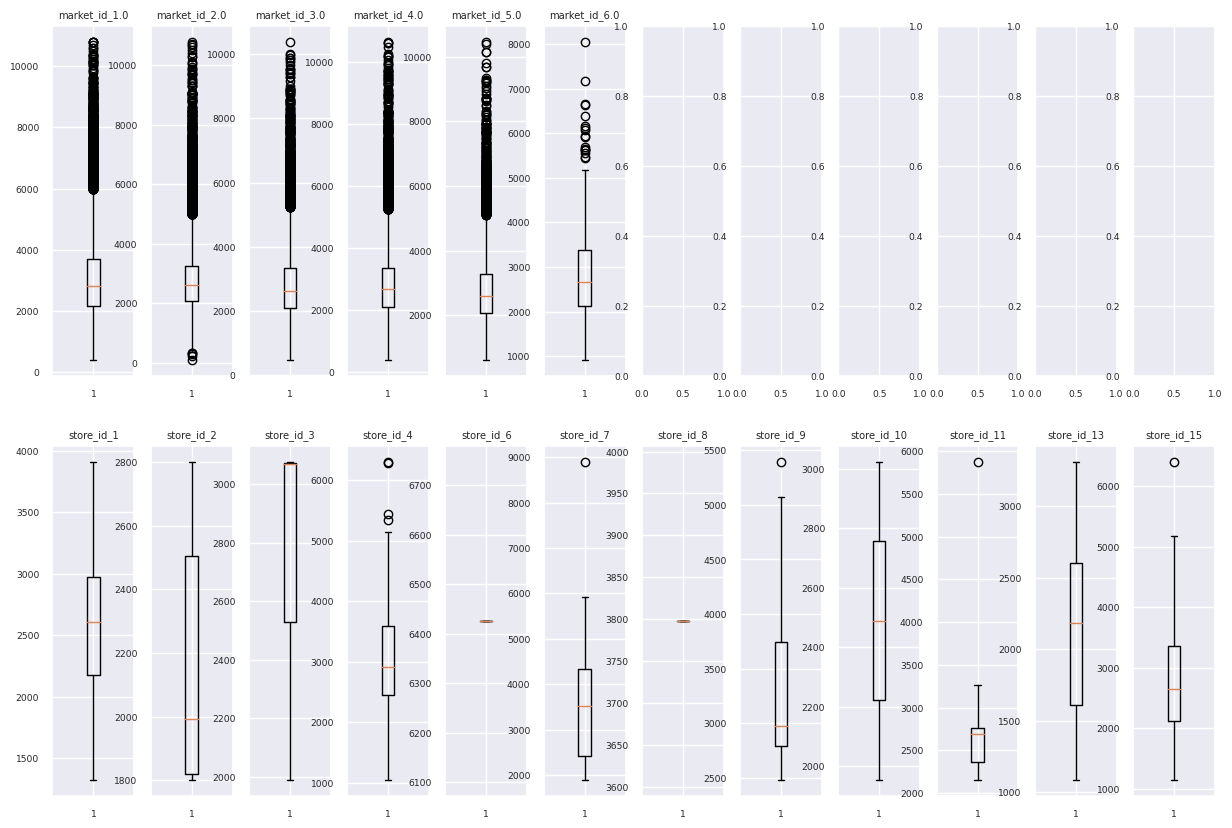

In [19]:
# are certain markets or stores more prone to short/long tail orders?
from modules.main.analysis import *

upper_threshold = historical_data['delivery_duration_sec'].quantile(0.90)
lower_threshold = historical_data['delivery_duration_sec'].quantile(0.10)
print("threshold for long tail: {} percentile, {}, or {} minutes".format(0.90, upper_threshold, upper_threshold/60))
print("threshold for short tail: {} percentile, {} or {} minutes".format(0.10, lower_threshold, lower_threshold/60))
fig, axs = plt.subplots(2, 12, figsize=(15, 10))

for i, col in enumerate(['market_id', 'store_id']):
    for y, v in enumerate(sorted(historical_data[col].unique())[:12]):
        name = "{}_{}".format(col, v)
        print("name: {}".format(name))
        domain_df = historical_data.loc[historical_data[col] == v]
        axs[i,y].boxplot(domain_df['delivery_duration_sec'])
        axs[i,y].set_title(name)
        long_tails = domain_df.loc[domain_df['delivery_duration_sec'] >= upper_threshold]
        short_tails = domain_df.loc[domain_df['delivery_duration_sec'] <= lower_threshold]
        print("long tails ratio: {}".format(len(long_tails)/len(domain_df)))
        print("short tails ratio: {}".format(len(short_tails)/len(domain_df)))


observations: some market and stores are more prone to long/short tail orders, which could cause our predictor to be too early or late

In [20]:
%load_ext autoreload
%autoreload 2
# checking variability of n bins of data across time 
from modules.main.helpers import *
X_hist = historical_data[p.decision_features].to_numpy()
y_hist = historical_data['delivery_duration_sec'].astype('int32').to_numpy()
for i in range(p.n_folds):
        # returns aggregate of ith slice from each p.stacking_target
        X_train, X_val, y_train, y_val = return_slice(X_hist, y_hist, i, single=True)

The dataset already has a lot of variability across features, but what about across time? <br>
observation: markets and store seen trends across large chunks of time that can be exploited. Options are: <br>
a) time-representative features, as we've already seen with weekend, hour or part of a day for example; <br>
b) time-series crafted features, which are features that seek for informative patterns about a sample over time, such as the average subtotal over the last 24 hours at a given store; <br> 
c) dynamic time-series crafted features, which consists of stacking multiple samples together to exploit information across them for a single sample. Example: an input with 5 stacks labelled with the current order and the last 4 before it (if any) <br>
- with the latter, we must validate the data on sequential data it has never seen, thereore splits must be sequential, not random
- - example: train on the first 80% and validate on the last 20%
- - example: train on last 80% and validate on the first 20%

In [ ]:
# random kfold

TEST

In [ ]:
# distribution

# drift comparison

# notebook:
        #     exact numbe of orders per store/how many have zeros, not just plot
        #     analysis on chunks of each model
        #     *** boxplots for all 15 params, x5, x6
        #     *** +dates
        #     test results for singular, previous stack, prev+post stack, market_id vs store_id (6jobs, read from files)
        #     ** mean, std, max, min
        #       drift comparison between previous stack and prev+post stack for updated result comparison
        #     model analysis for features that impac thet most
        #     5 random kfold analysis to show difference in general
        # feature analysis: % of 0's in my columns 
        # correlating the short/long tail with something (do a simple .corr())

        # vs job:
        #     * short/large tail metrics on val
